In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

nba = pd.read_csv('nba_games.csv')
print(nba.head())

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  


In [11]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())


            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

In [16]:
knicks_pts_10 = nba_2010.pts[nba.fran_id=='Knicks']
nets_pts_10 = nba_2010.pts[nba.fran_id=='Nets']

In [17]:
print(knicks_pts_10,nets_pts_10)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64 21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


In [18]:
knicks_mean_score = np.mean(knicks_pts_10)
nets_mean_score = np.mean(nets_pts_10)
diff_means = knicks_mean_score - nets_mean_score

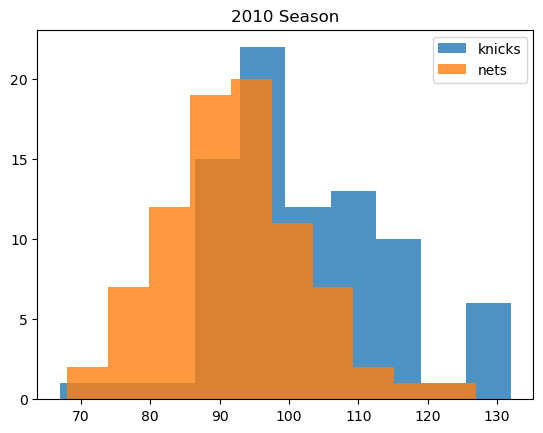

In [25]:
plt.hist(knicks_pts_10, alpha=0.8,label='knicks')
plt.hist(nets_pts_10, alpha=0.8,label = 'nets')
plt.legend()
plt.title("2010 Season")
plt.show()

In [27]:
knicks_pts_14 = nba_2014.pts[nba.fran_id=='Knicks']
nets_pts_14 = nba_2014.pts[nba.fran_id=='Nets']
knicks_mean_score_2014 = np.mean(knicks_pts_14)
nets_mean_score_2014 = np.mean(nets_pts_14)
diff_means = knicks_mean_score - nets_mean_score
print(knicks_pts_14, nets_pts_14)


23469     90
23473     81
23480    100
23486     97
23490    101
        ... 
23849     91
23863    108
23867    100
23871    109
23875     95
Name: pts, Length: 82, dtype: int64 23468     94
23475    101
23482     86
23484    104
23494    108
        ... 
23900     86
23903     82
23906    104
23909     96
23912     94
Name: pts, Length: 94, dtype: int64


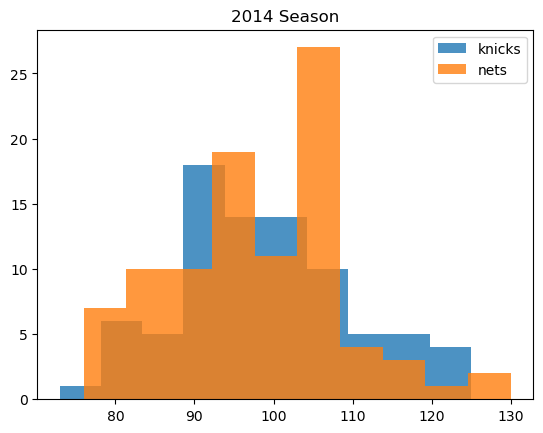

In [30]:
plt.hist(knicks_pts_14, alpha=0.8,label='knicks')
plt.hist(nets_pts_14, alpha=0.8,label = 'nets')
plt.legend()
plt.title("2014 Season")
plt.show()


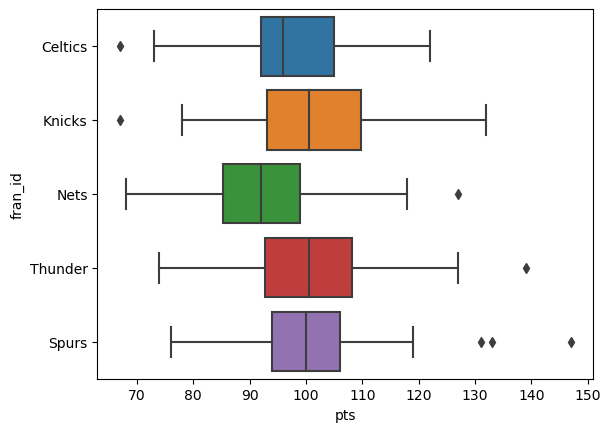

In [31]:
plt.clf() #to close the previous plot
sns.boxplot(data = nba_2010, x = 'pts', y = 'fran_id')
plt.show()


In [37]:
# To Analyze if teams tend to win more games at home compared to away
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [39]:
# Convert table of frequency to a table of proportions 
location_result_proportions = location_result_freq/len(nba_2010.game_result)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [43]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


In [45]:
# calculate the covariance between forecast and point_diff in the dataset
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
point_diff_forecast_cov

array([[1.86559287e+02, 1.37461257e+00],
       [1.37461257e+00, 5.22668307e-02]])

In [46]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)

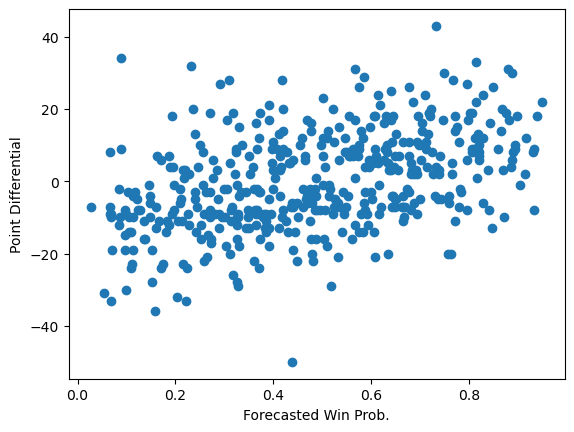

In [47]:
# scatter plot of forecast(on the x-axis) and point_diff(on the y-axis)
plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()
